# <font color = orange> 1. Business Problem Understanding </font> 

## Level 1 = Task 1
#### Task: Top Cuisines
- Determine the top three most common cuisines in the dataset.
- Calculate the percentage of restaurants that serve each of the top cuisines.

## Level 1 = Task 2
#### Task: City Analysis
- Identify the city with the highest number of restaurants in the dataset.
- Calculate the average rating for restaurants in each city.
- Determine the city with the highest average rating.

## Level 1 = Task 3
#### Task: Price Range Distribution
- Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
- Calculate the percentage of restaurants in each price range category

## Level 1 = Task 4
#### Task: Online Delivery
- Determine the percentage of restaurants that offer online delivery.
- Compare the average ratings of restaurants with and without online delivery.

# ................................................................

## Level 2 = Task 1
#### Task: Restaurant Ratings
- Analyze the distribution of aggregate ratings and determine the most common rating range.
- Calculate the average number of votes received by restaurants.

## Level 2 = Task 2
#### Task: Cuisine Combination
- Identify the most common combinations of cuisines in the dataset.
- Determine if certain cuisine combinations tend to have higher ratings.

## Level 2 = Task 3
#### Task: Geographic Analysis
- Plot the locations of restaurants on a map using longitude and latitude coordinates.
- Identify any patterns or clusters of restaurants in specific areas.


## Level 2 = Task 4
#### Task: Restaurant Chains
- Identify if there are any restaurant chains present in the dataset.
- Analyze the ratings and popularity of different restaurant chains.

# ................................................................

## Level 3 = Task 1
#### Task: Restaurant Reviews
- Analyze the text reviews to identify the most common positive and negative keywords.
- Calculate the average length of reviews and explore if there is a relationship between review length and rating.


## Level 3 = Task 2
#### Task: Votes Analysis
- Identify the restaurants with the highest and lowest number of votes.
- Analyze if there is a correlation between the number of votes and the rating of a restaurant.

## Level 3 = Task 3
#### Task: Price Range vs. Online Delivery and
- Table Booking Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
- Determine if higher-priced restaurants are more likely to offer these services.

>>

# <font color = orange> 2. Dataset Understanding </font> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'Dataset.csv')

## Exploratory Data Analysis

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Separate Continuous and Categorical columns

In [5]:
continuous = ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 
              'Average Cost for two', 'Aggregate rating', 'Votes']

discrete_categorical = ['Restaurant Name', 'City', 'Address', 'Locality', 
                        'Locality Verbose', 'Cuisines', 'Currency',  
                        'Has Table booking', 'Has Online delivery', 
                        'Is delivering now', 'Switch to order menu', 
                        'Rating color', 'Rating text']
 
discrete_count = ['Price range']

In [6]:
df['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [7]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.shape

(9551, 21)

# <font color = orange> 3. Dataset Cleaning </font> 

In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

## <font color = aqua> (Continuous) "Country Code" column data cleaning </font> 

In [13]:
# check data type 
df['Country Code'].dtypes

dtype('int64')

In [14]:
# wrong data or not
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [15]:
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

##### in unique value, we can see, we don't have any wrong data

In [16]:
# wrong data type or not
df['Country Code'].dtype

dtype('int64')

##### as we can also see, the data type is correct, we don't to change datatype

In [17]:
# is there any missing value or not
df['Country Code'].isnull().sum()

0

##### no, in our dataset, we don't have any missing values

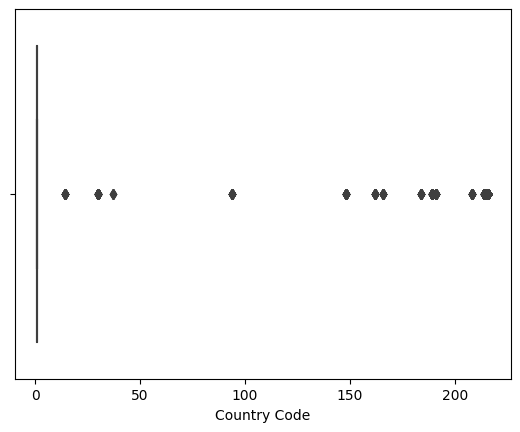

In [18]:
# do we have any outliers or not
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Country Code'])
plt.show()

#### yes, in Country Code, we have outliers but we don't need to remove these outliers because this column is not important for us.

## <font color = aqua> (Categorical) "Restaurant Name" Code column data cleaning </font> 

In [19]:
# check data type 
df['City'].dtypes

dtype('O')

In [20]:
df['City'].isnull().sum()

0

In [21]:
df['Restaurant Name'].unique()

array(['Le Petit Souffle', 'Izakaya Kikufuji', 'Heat - Edsa Shangri-La',
       ..., 'Huqqa', 'A���k Kahve', "Walter's Coffee Roastery"],
      dtype=object)

In [22]:
df['Restaurant Name'].nunique()

7446

In [23]:
df['Restaurant Name']

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                 Naml۱ Gurme
9547                Ceviz A��ac۱
9548                       Huqqa
9549                 A���k Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9551, dtype: object

In [24]:
df['Restaurant Name'] = df['Restaurant Name'].str.replace('�', '')
df['Restaurant Name']

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                 Naml۱ Gurme
9547                  Ceviz Aac۱
9548                       Huqqa
9549                    Ak Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9551, dtype: object

## <font color = aqua> (Categorical) "City" column data cleaning </font> 

In [25]:
# check data type 
df['City'].dtypes

dtype('O')

In [26]:
# check for the missing value
df['City'].isnull().sum()

0

In [27]:
df['City'] = df['City'].str.replace('�', '')
df['City']

0            Makati City
1            Makati City
2       Mandaluyong City
3       Mandaluyong City
4       Mandaluyong City
              ...       
9546             stanbul
9547             stanbul
9548             stanbul
9549             stanbul
9550             stanbul
Name: City, Length: 9551, dtype: object

In [28]:
#for name in df['City']:
    #print(name.replace('�', ''))

## <font color = aqua> (Categorical) "Address" column data cleaning </font> 

In [29]:
# check data type 
df['Address'].dtypes

dtype('O')

In [30]:
df['Address'].isnull().sum()

0

In [31]:
df['Address'] = df['Address'].str.replace('�', '')
df['Address']

0       Third Floor, Century City Mall, Kalayaan Avenu...
1       Little Tokyo, 2277 Chino Roces Avenue, Legaspi...
2       Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...
3       Third Floor, Mega Fashion Hall, SM Megamall, O...
4       Third Floor, Mega Atrium, SM Megamall, Ortigas...
                              ...                        
9546    Kemanke Karamustafa Paa Mahallesi, R۱ht۱m Cadd...
9547    Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...
9548    Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...
9549    Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...
9550    Cafeaa Mahallesi, Bademalt۱ Sokak, No 21/B, Ka...
Name: Address, Length: 9551, dtype: object

## <font color = aqua> (Categorical) "Locality" column data cleaning </font> 

In [32]:
# check data type 
df['Locality'].dtypes

dtype('O')

In [33]:
df['Locality'].isnull().sum()

0

In [34]:
df['Locality'] = df['Locality'].str.replace('�', '')
df['Locality']

0        Century City Mall, Poblacion, Makati City
1       Little Tokyo, Legaspi Village, Makati City
2       Edsa Shangri-La, Ortigas, Mandaluyong City
3           SM Megamall, Ortigas, Mandaluyong City
4           SM Megamall, Ortigas, Mandaluyong City
                           ...                    
9546                                       Karak_y
9547                                       Kouyolu
9548                                      Kuru_eme
9549                                      Kuru_eme
9550                                          Moda
Name: Locality, Length: 9551, dtype: object

## <font color = aqua> (Categorical) "Locality Verbose" column data cleaning </font> 

In [35]:
# check data type 
df['Locality Verbose'].dtypes

dtype('O')

In [36]:
df['Locality Verbose'].isnull().sum()

0

In [37]:
df['Locality Verbose'] = df['Locality Verbose'].str.replace('�', '')
df['Locality Verbose']

0       Century City Mall, Poblacion, Makati City, Mak...
1       Little Tokyo, Legaspi Village, Makati City, Ma...
2       Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...
3       SM Megamall, Ortigas, Mandaluyong City, Mandal...
4       SM Megamall, Ortigas, Mandaluyong City, Mandal...
                              ...                        
9546                                     Karak_y, stanbul
9547                                     Kouyolu, stanbul
9548                                    Kuru_eme, stanbul
9549                                    Kuru_eme, stanbul
9550                                        Moda, stanbul
Name: Locality Verbose, Length: 9551, dtype: object

## <font color = aqua> (Continuous)  "Longitude and Latitude" column data cleaning </font> 

In [38]:
# check if there are any uniques values are given
df['Longitude'].unique()

array([121.027535  , 121.014101  , 121.056831  , ...,  29.03464001,
        29.036019  ,  29.02601603])

In [39]:
# check data type 
df['Longitude'].dtypes

dtype('float64')

In [40]:
df['Longitude'] = df['Longitude'].astype('float')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [41]:
df['Longitude'].isnull().sum()

0

In [42]:
df['Latitude'].isnull().sum()

0

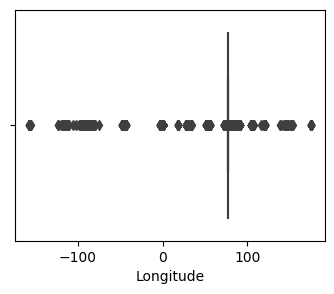

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Longitude'])
plt.show()

## <font color = aqua> (Categorical)  "Cuisines" column data cleaning </font> 

In [44]:
# check data type 
df['Cuisines'].dtypes

dtype('O')

In [45]:
# check missing values
df['Cuisines'].isnull().sum()

9

In [46]:
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [47]:
df['Cuisines'].isnull().sum()

0

##### now, here we have removed all the missing values

In [48]:
# clean data
df['Cuisines'] = df['Cuisines'].str.replace('�', '')
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

## <font color = aqua> (Continuous) "Average Cost for two" column data cleaning </font> 

In [49]:
# check data type 
df['Average Cost for two'].dtypes

dtype('int64')

In [50]:
# check any missing value
df['Average Cost for two'].isnull().sum()

0

here, we don't have missing values

## <font color = aqua> (Categorical) "Currency" column data cleaning </font> 

In [51]:
# check data type 
df['Currency'].dtypes

dtype('O')

In [52]:
# check any missing value
df['Currency'].isnull().sum()

0

## <font color = aqua> (Categorical) "Has Table booking" column data cleaning </font> 

In [53]:
# check data type 
df['Has Table booking'].dtypes

dtype('O')

In [54]:
# check any missing value
df['Has Table booking'].isnull().sum()

0

## <font color = aqua> (Categorical) "Has Online delivery" column data cleaning </font> 

In [55]:
# check data type 
df['Has Online delivery'].dtypes

dtype('O')

In [56]:
# check any missing value
df['Has Online delivery'].isnull().sum()

0

## <font color = aqua> (Categorical) "Is delivering now" column data cleaning </font> 

In [57]:
# check data type 
df['Is delivering now'].dtypes

dtype('O')

In [58]:
# check any missing value
df['Is delivering now'].isnull().sum()

0

## <font color = aqua> (Categorical) "Switch to order menu" column data cleaning </font> 

In [59]:
# check data type 
df['Switch to order menu'].dtypes

dtype('O')

In [60]:
# check any missing value
df['Switch to order menu'].isnull().sum()

0

## <font color = aqua> (Discrete_count) "Price Range" column data cleaning </font> 

In [61]:
# check data type 
df['Price range'].dtypes

dtype('int64')

In [62]:
# check any missing value
df['Price range'].isnull().sum()

0

## <font color = aqua> (Continuous) "Aggregate Rating" column data cleaning </font> 

In [63]:
# check data type
df['Aggregate rating'].dtypes

dtype('float64')

In [64]:
df['Aggregate rating'] = df['Aggregate rating'].astype('float')
df['Aggregate rating']

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [65]:
# check any missing value
df['Aggregate rating'].isnull().sum()

0

In [66]:
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

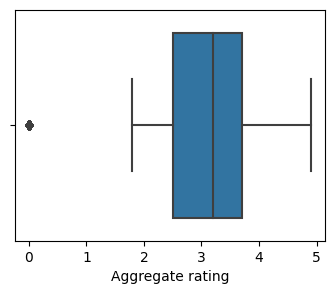

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Aggregate rating'])
plt.show()

## <font color = aqua> (Categorical) "Rating color" column data cleaning </font> 

In [68]:
# check data type
df['Rating color'].dtypes

dtype('O')

In [69]:
# check any missing value
df['Rating color'].isnull().sum()

0

## <font color = aqua> (Categorical) "Rating text" column data cleaning </font> 

In [70]:
# check data type
df['Rating text'].dtypes

dtype('O')

In [71]:
# check any missing value
df['Rating text'].isnull().sum()

0

## <font color = aqua> (Continuous) "Votes" column data cleaning </font> 

In [72]:
# check data type
df['Votes'].dtypes

dtype('int64')

In [73]:
# check any missing value
df['Votes'].isnull().sum()

0

In [74]:
df['Votes'].value_counts()

Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: count, Length: 1012, dtype: int64

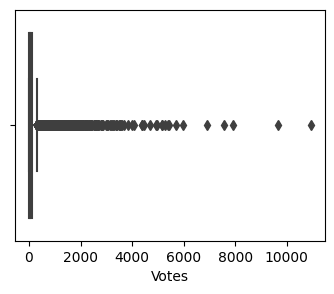

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Votes'])
plt.show()

## Drop unimportant columns

In [76]:
df.drop(['Country Code', 'Address', 'Address', 'Locality',
       'Locality Verbose', 'Currency', 'Is delivering now', 'Average Cost for two', 'Switch to order menu', 'Rating color'], axis=1, inplace=True)

In [77]:
df.head(1)

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,121.027535,14.565443,"French, Japanese, Desserts",Yes,No,3,4.8,Excellent,314


In [78]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Longitude', 'Latitude',
       'Cuisines', 'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes'],
      dtype='object')

## Replace columns name

In [79]:
df.rename(columns = {'Has Online delivery': 'Online_delivery', 'Has Table booking':'Table_booking'}, inplace=True)
df.head(1)

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Cuisines,Table_booking,Online_delivery,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,121.027535,14.565443,"French, Japanese, Desserts",Yes,No,3,4.8,Excellent,314


### After changes understand the given data again

In [80]:
df.shape

(9551, 12)

In [81]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Longitude', 'Latitude',
       'Cuisines', 'Table_booking', 'Online_delivery', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes'],
      dtype='object')

In [82]:
df.dtypes

Restaurant ID         int64
Restaurant Name      object
City                 object
Longitude           float64
Latitude            float64
Cuisines             object
Table_booking        object
Online_delivery      object
Price range           int64
Aggregate rating    float64
Rating text          object
Votes                 int64
dtype: object

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant ID     9551 non-null   int64  
 1   Restaurant Name   9551 non-null   object 
 2   City              9551 non-null   object 
 3   Longitude         9551 non-null   float64
 4   Latitude          9551 non-null   float64
 5   Cuisines          9551 non-null   object 
 6   Table_booking     9551 non-null   object 
 7   Online_delivery   9551 non-null   object 
 8   Price range       9551 non-null   int64  
 9   Aggregate rating  9551 non-null   float64
 10  Rating text       9551 non-null   object 
 11  Votes             9551 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 895.5+ KB


### New columns name

In [84]:
continuous = ['Restaurant ID', 'Longitude', 'Latitude', 'Aggregate rating', 'Votes']

discrete_categorical = ['Restaurant Name', 'City', 'Cuisines',  
                        'Table_booking', 'Online_delivery', 
                         'Rating text']
 
discrete_count = ['Price range']

In [85]:
df[continuous].describe()

,Restaurant ID,Longitude,Latitude,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,64.126574,25.854381,2.666370,156.909748
std,8.791521e+06,41.467058,11.007935,1.516378,430.169145
min,5.300000e+01,-157.948486,-41.330428,0.000000,0.000000
25%,3.019625e+05,77.081343,28.478713,2.500000,5.000000
50%,6.004089e+06,77.191964,28.570469,3.200000,31.000000
75%,1.835229e+07,77.282006,28.642758,3.700000,131.000000
max,1.850065e+07,174.832089,55.976980,4.900000,10934.000000


In [86]:
df[discrete_categorical].describe()

,Restaurant Name,City,Cuisines,Table_booking,Online_delivery,Rating text
count,9551,9551,9551,9551,9551,9551
unique,7446,141,1825,2,2,6
top,Cafe Coffee Day,New Delhi,North Indian,No,No,Average
freq,83,5473,945,8393,7100,3737


In [87]:
# df.describe(include='all')

### Which columns are needed and which one not?

In [88]:
removed_columns = ['Restaurant ID', 'Country Code', 'Address', 'Locality', 
                   'Locality Verbose',  'Average Cost for two', 'Currency', 'Is delivering now', 
                   'Switch to order menu', 'Rating color']

needed_columns = ['Longitude', 'Latitude', 'Aggregate rating', 'Votes', 'Restaurant Name', 
 'City', 'Cuisines',  'Table_booking', 'Online_delivery',  'Rating text', 'Price range']

# <font color = orange> Analysis for Business Problem Understanding </font> 

## Level 1 = Task 1
#### Task: Top Cuisines
- Determine the top three most common cuisines in the dataset.
- Calculate the percentage of restaurants that serve each of the top cuisines.


based on problem requirement which column and plots I am needed for analysis?

columns name:
1. Cuisines

plots name: when we are analysing one column.
1. hist plot
2. Count plot
3. Bar plot
4. Box plot
5. Violin plot

### Determine the top three most common cuisines in the dataset.

In [89]:
df.head(1)

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Cuisines,Table_booking,Online_delivery,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,121.027535,14.565443,"French, Japanese, Desserts",Yes,No,3,4.8,Excellent,314


In [90]:
df['Cuisines'].head()

0          French, Japanese, Desserts
1                            Japanese
2    Seafood, Asian, Filipino, Indian
3                     Japanese, Sushi
4                    Japanese, Korean
Name: Cuisines, dtype: object

In [91]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [92]:
Count_Cuisines = df['Cuisines'].value_counts()
Count_Cuisines

Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [93]:
top_three_cuisines = Count_Cuisines.head(3)
print('"The most three Cuisines are:"\n\n' ,top_three_cuisines)

"The most three Cuisines are:"

 Cuisines
North Indian             945
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


As we can see based on our value_counts the most common three cuisines are **North Indian, Chinese**, and **Chinese**

### Calculate the percentage of restaurants that serve each of the top cuisines.

In [94]:
df['Restaurant ID'].nunique()

9551

In [95]:
number_of_Restaurant = len(df['Restaurant ID'])
number_of_Restaurant

9551

In [96]:
percentage_Restaurant = (top_three_cuisines/number_of_Restaurant) * 100
print('"The percentage of the Restaurant is:"\n\n' ,percentage_Restaurant)

"The percentage of the Restaurant is:"

 Cuisines
North Indian             9.894252
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


>
## Level 1 = Task 2
#### Task: City Analysis
- Identify the city with the highest number of restaurants in the dataset.
- Calculate the average rating for restaurants in each city.
- Determine the city with the highest average rating.

### Identify the city with the highest number of restaurants in the dataset.

In [97]:
count_city = df['City'].value_counts()
count_city

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

In [98]:
highest_Restaurant = count_city.head(1)
print('"The city with highest number of Restaurant is:"\n\n' ,highest_Restaurant)

"The city with highest number of Restaurant is:"

 City
New Delhi    5473
Name: count, dtype: int64


### Calculate the average rating for restaurants in each city.

In [99]:
df['City']

0            Makati City
1            Makati City
2       Mandaluyong City
3       Mandaluyong City
4       Mandaluyong City
              ...       
9546             stanbul
9547             stanbul
9548             stanbul
9549             stanbul
9550             stanbul
Name: City, Length: 9551, dtype: object

In [100]:
avg_rating_Restaurant = df.groupby('City')['Aggregate rating'].mean()
print('"The average rating for each city Restaurant is:"\n\n' ,avg_rating_Restaurant)

"The average rating for each city Restaurant is:"

 City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
stanbul            4.292857
Name: Aggregate rating, Length: 141, dtype: float64


### Determine the city with the highest average rating.

In [101]:
highest_rating = avg_rating_Restaurant.max()
print('"The city with highest average rating is:"\n\n' ,highest_rating)

"The city with highest average rating is:"

 4.9


>
## Level 1 = Task 3
#### Task: Price Range Distribution
- Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
- Calculate the percentage of restaurants in each price range category

### Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

3536 , 2311 , 1200 , 552


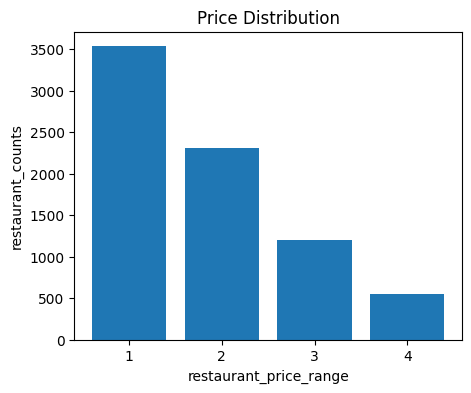

In [102]:
a = df[df['Price range']==1]['Restaurant Name'].nunique()
b = df[df['Price range']==2]['Restaurant Name'].nunique()
c = df[df['Price range']==3]['Restaurant Name'].nunique()
d = df[df['Price range']==4]['Restaurant Name'].nunique()
print(a, ",", b, ",", c, ",", d)

restaurant_prices = ['1', '2', '3', '4'] 
restaurant_counts = [3536, 2311, 1200, 552]
plt.figure(figsize=(5, 4))
plt.title('Price Distribution')
plt.xlabel('restaurant_price_range')

# this restaurant_counts have unique values not duplicates
plt.ylabel('restaurant_counts')
plt.bar(restaurant_prices, restaurant_counts)
plt.show()

### Calculate the percentage of restaurants in each price range category

In [103]:
price_range = df['Price range'].value_counts()
price_range

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [104]:
number_of_Restaurant = len(df['Restaurant ID'])
number_of_Restaurant

9551

In [105]:
percentage_of_Restaurant = (price_range/number_of_Restaurant) * 100
print('"The percetage of restaurant in each price range :"\n\n' ,percentage_Restaurant)

"The percetage of restaurant in each price range :"

 Cuisines
North Indian             9.894252
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


>
## Level 1 = Task 4
#### Task: Online Delivery
- Determine the percentage of restaurants that offer online delivery.
- Compare the average ratings of restaurants with and without online delivery.

### Determine the percentage of restaurants that offer online delivery.

In [106]:
online_delivery = df['Online_delivery'].value_counts()
online_delivery

Online_delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [107]:
number_of_Restaurant = len(df['Restaurant ID'])
number_of_Restaurant

9551

In [108]:
percentage_Restaurant_online_deliver = (online_delivery/number_of_Restaurant) * 100
print('"The percentage of restaurant that deliver food online or not:"\n\n' ,percentage_Restaurant_online_deliver)

"The percentage of restaurant that deliver food online or not:"

 Online_delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64


### Compare the average ratings of restaurants with and without online delivery.

In [109]:
df['Online_delivery'].value_counts()

Online_delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [110]:
average_rating_of_restaurant = df.groupby('Online_delivery')['Aggregate rating'].mean()
print('"The average rating for the restaurant is:"\n\n' ,average_rating_of_restaurant)

"The average rating for the restaurant is:"

 Online_delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


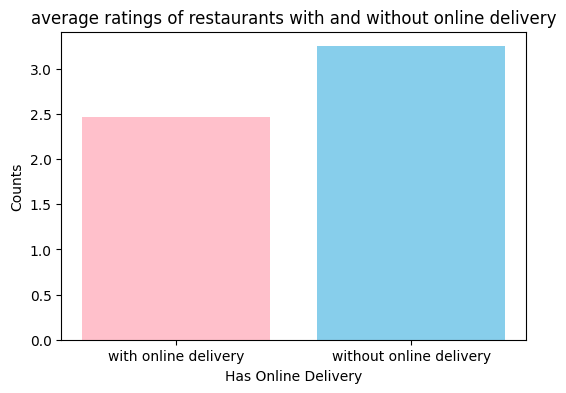

In [111]:
x_axis = ['with online delivery', 'without online delivery']
plt.figure(figsize=(6, 4))
plt.bar(x_axis, average_rating_of_restaurant, color=['pink', 'skyblue'])
plt.xlabel('Has Online Delivery')
plt.ylabel('Counts')
plt.title('average ratings of restaurants with and without online delivery')
plt.show()

In [112]:
with_delivery = df[df['Online_delivery']=='Yes']
average_rating_with_delivery = with_delivery['Aggregate rating'].mean()
print(average_rating_with_delivery)

with_out_delivery = df[df['Online_delivery']=='No']
average_rating_with_out_delivery = with_out_delivery['Aggregate rating'].mean()
print(average_rating_with_out_delivery)

average_rating = [average_rating_with_delivery, average_rating_with_out_delivery]

3.2488372093023257
2.465295774647887


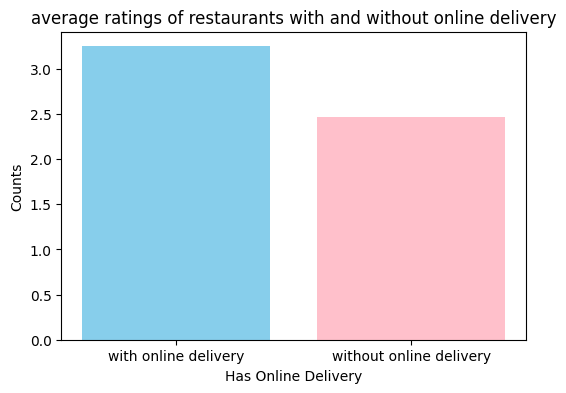

In [113]:
x_axis = ['with online delivery', 'without online delivery']
plt.figure(figsize=(6, 4))
plt.bar(x_axis, average_rating, color=['skyblue', 'pink'])
plt.xlabel('Has Online Delivery')
plt.ylabel('Counts')
plt.title('average ratings of restaurants with and without online delivery')
plt.show()

In [114]:
online_delivery_NO = df[df['Online_delivery'] == 'No']['Aggregate rating'].mean()
online_delivery_YES = df[df['Online_delivery'] == 'Yes']['Aggregate rating'].mean()

<BarContainer object of 2 artists>

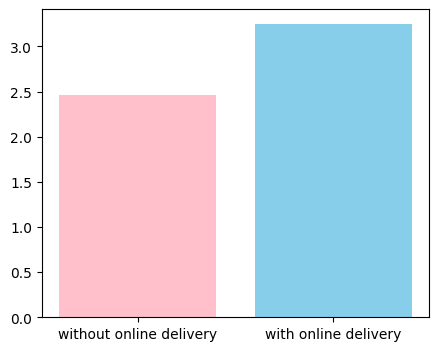

In [115]:
labels = ['without online delivery', 'with online delivery']
aggregate_rating_Yes_No = [online_delivery_NO, online_delivery_YES]
plt.figure(figsize=(5, 4))
plt.bar(labels, aggregate_rating_Yes_No, color=['pink', 'skyblue'])

## Level 2 = Task 1
#### Task: Restaurant Ratings
- Analyze the distribution of aggregate ratings and determine the most common rating range.
- Calculate the average number of votes received by restaurants.

### Analyze the distribution of aggregate ratings and determine the most common rating range.

In [116]:
online_delivery_NO = df[df['Online_delivery'] == 'No']['Aggregate rating'].mean()
online_delivery_YES = df[df['Online_delivery'] == 'Yes']['Aggregate rating'].mean()

<BarContainer object of 2 artists>

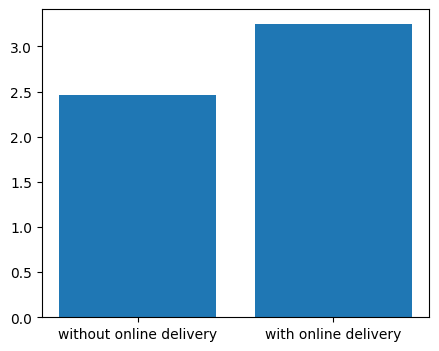

In [117]:
labels = ['without online delivery', 'with online delivery']
aggregate_rating_Yes_No = [online_delivery_NO, online_delivery_YES]
plt.figure(figsize=(5, 4))
plt.bar(labels, aggregate_rating_Yes_No)

### Calculate the average number of votes received by restaurants.

In [118]:
df['Votes'].value_counts()

Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: count, Length: 1012, dtype: int64

In [119]:
number_of_Restaurant = df['Restaurant Name']

In [120]:
df[df['Restaurant Name'] == '#45']

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Cuisines,Table_booking,Online_delivery,Price range,Aggregate rating,Rating text,Votes
2459,3100446,#45,Mangalore,0.0,0.0,Cafe,No,No,2,3.6,Good,209


In [121]:
df.groupby(number_of_Restaurant)['Votes'].mean()

Restaurant Name
#45                     209.0
#Dilliwaala6            124.0
#InstaFreeze              2.0
#OFF Campus             216.0
#Urban Caf               49.0
                        ...  
t Lounge by Dilmah       34.0
tashas                  374.0
ukuraa Sofras۱          296.0
wagamama                131.0
{Niche} - Cafe & Bar    492.0
Name: Votes, Length: 7446, dtype: float64

## Level 2 = Task 2
#### Task: Cuisine Combination
- Identify the most common combinations of cuisines in the dataset.
- Determine if certain cuisine combinations tend to have higher ratings.

### Identify the most common combinations of cuisines in the dataset.

In [122]:
cuisine_counts = df['Cuisines'].str.split(', ')
cuisine_counts

0             [French, Japanese, Desserts]
1                               [Japanese]
2       [Seafood, Asian, Filipino, Indian]
3                        [Japanese, Sushi]
4                       [Japanese, Korean]
                       ...                
9546                             [Turkish]
9547     [World Cuisine, Patisserie, Cafe]
9548              [Italian, World Cuisine]
9549                     [Restaurant Cafe]
9550                                [Cafe]
Name: Cuisines, Length: 9551, dtype: object

In [123]:
cuisine_counts = df['Cuisines'].str.split(', ', expand=True)
cuisine_counts

,0,1,2,3,4,5,6,7
0,French,Japanese,Desserts,None,None,None,None,None
1,Japanese,None,None,None,None,None,None,None
2,Seafood,Asian,Filipino,Indian,None,None,None,None
3,Japanese,Sushi,None,None,None,None,None,None
4,Japanese,Korean,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
9546,Turkish,None,None,None,None,None,None,None
9547,World Cuisine,Patisserie,Cafe,None,None,None,None,None
9548,Italian,World Cuisine,None,None,None,None,None,None
9549,Restaurant Cafe,None,None,None,None,None,None,None


In [124]:
cuisine_counts = df['Cuisines'].str.split(', ', expand=True).stack()
cuisine_counts

0     0             French
      1           Japanese
      2           Desserts
1     0           Japanese
2     0            Seafood
                ...       
9547  2               Cafe
9548  0            Italian
      1      World Cuisine
9549  0    Restaurant Cafe
9550  0               Cafe
Length: 19719, dtype: object

In [125]:
cuisine_counts = df['Cuisines'].str.split(', ', expand=True).stack().value_counts()
cuisine_counts

North Indian      3969
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Mineira              1
B_rek                1
Name: count, Length: 145, dtype: int64

In [126]:
cuisine_counts = df['Cuisines'].str.split(', ', expand=True).stack().value_counts()
cuisine_counts.head(1)
print('"The most common combination of cuisnines in the dataset is:"\n\n' ,cuisine_counts.head(1))

"The most common combination of cuisnines in the dataset is:"

 North Indian    3969
Name: count, dtype: int64


### Determine if certain cuisine combinations tend to have higher ratings.

In [127]:
cuisnine_higher_ratings = cuisine_counts/len(df['Aggregate rating']) * 100
cuisnine_higher_ratings
print('"The higher ratings of the cuisine combinations are:"\n\n' ,cuisnine_higher_ratings)

"The higher ratings of the cuisine combinations are:"

 North Indian      41.555858
Chinese           28.635745
Fast Food         20.793634
Mughlai           10.417757
Italian            7.999162
                    ...    
Fish and Chips     0.010470
Malwani            0.010470
Cuisine Varies     0.010470
Mineira            0.010470
B_rek              0.010470
Name: count, Length: 145, dtype: float64


## Level 2 = Task 3
#### Task: Geographic Analysis
- Plot the locations of restaurants on a map using longitude and latitude coordinates.
- Identify any patterns or clusters of restaurants in specific areas.

### Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [128]:
df.head(2)

,Restaurant ID,Restaurant Name,City,Longitude,Latitude,Cuisines,Table_booking,Online_delivery,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,121.027535,14.565443,"French, Japanese, Desserts",Yes,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,121.014101,14.553708,Japanese,Yes,No,3,4.5,Excellent,591


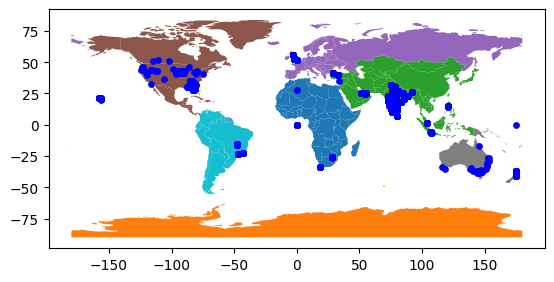

In [129]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Create Point geometry from latitude and longitude using shapely

gdf = gpd.GeoDataFrame(df, 
                      geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot('continent'), legend=True, figsize=(26, 12),
         marker='o', color='b', markersize=15)
plt.show()

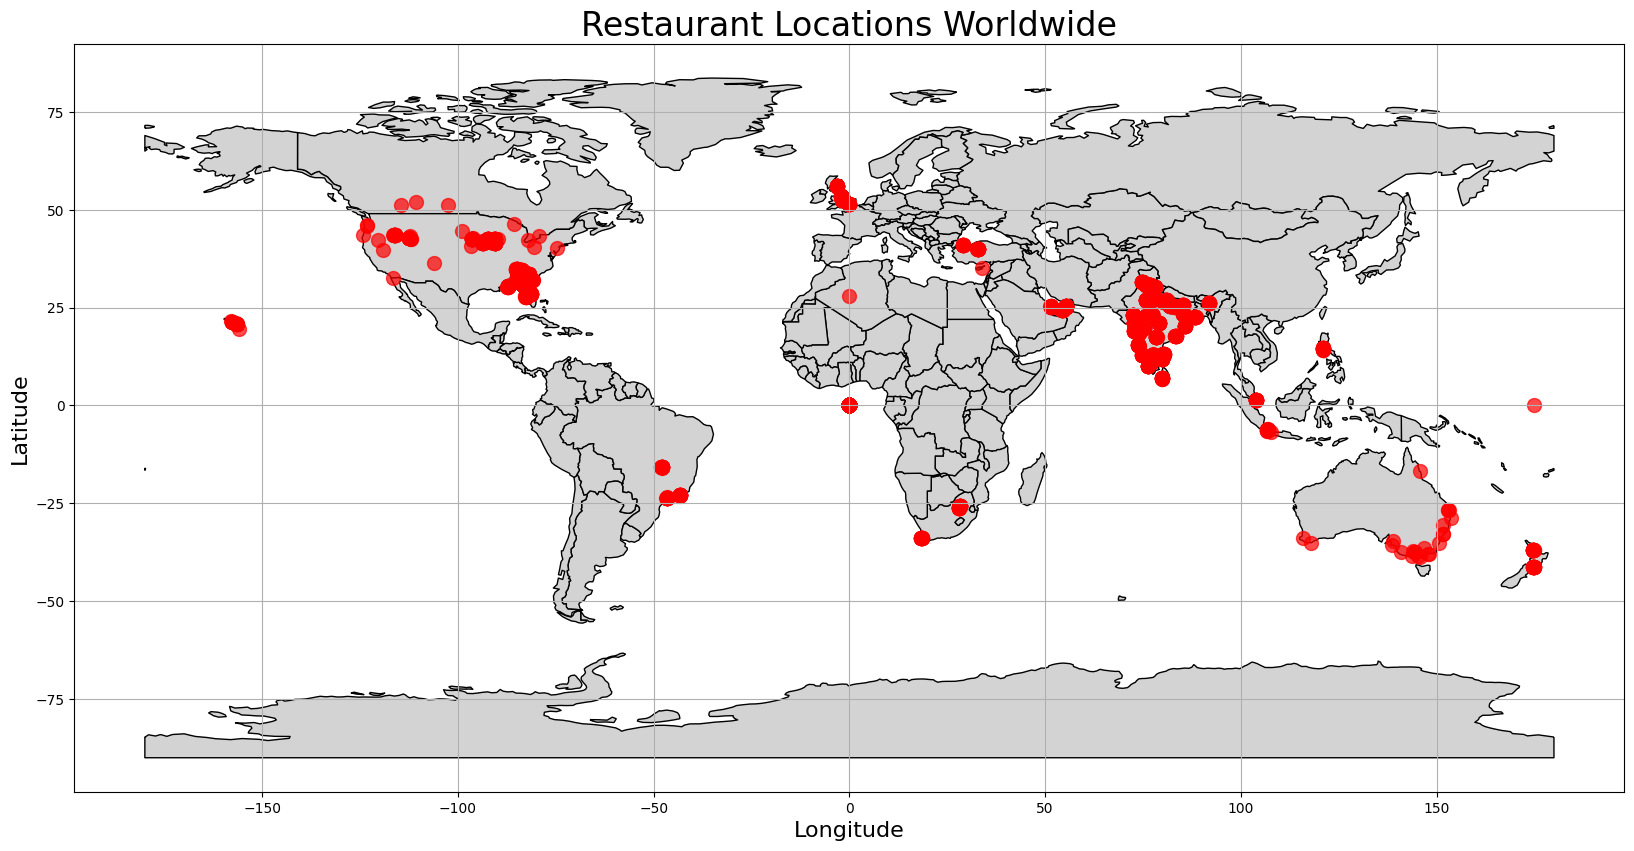

In [130]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Create Point geometry from latitude and longitude using shapely
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(20, 12), color='lightgray', edgecolor='black')

# Plot the restaurants on top of the world map
gdf.plot(ax=ax, marker='o', color='red', markersize=100, alpha=0.7)

# Add additional features to the map (you can customize this based on your needs)
ax.set_title("Restaurant Locations Worldwide", fontsize=24)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
plt.grid(True)

# Show the map
plt.show()


### Identify any patterns or clusters of restaurants in specific areas.

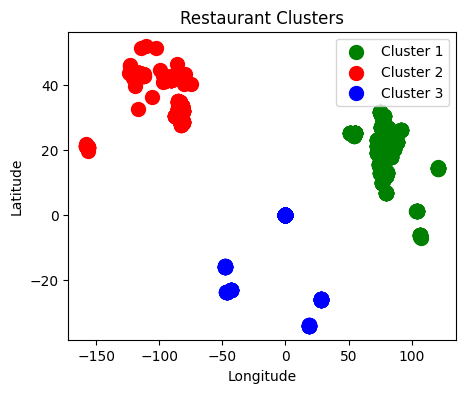

In [131]:
from sklearn.cluster import KMeans
X = df[['Longitude', 'Latitude']]

# Apply K-Means clustering
k_means = KMeans(n_clusters=5, init='k-means++', random_state=0)
df['Cluster'] = k_means.fit_predict(X)

plt.figure(figsize=(5, 4))
plt.scatter(X.values[df['Cluster'] == 0, 0], X.values[df['Cluster'] == 0, 1], s=100, c='green', label='Cluster 1')
plt.scatter(X.values[df['Cluster'] == 1, 0], X.values[df['Cluster'] == 1, 1], s=100, c='red', label='Cluster 2')
plt.scatter(X.values[df['Cluster'] == 2, 0], X.values[df['Cluster'] == 2, 1], s=100, c='blue', label='Cluster 3')
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


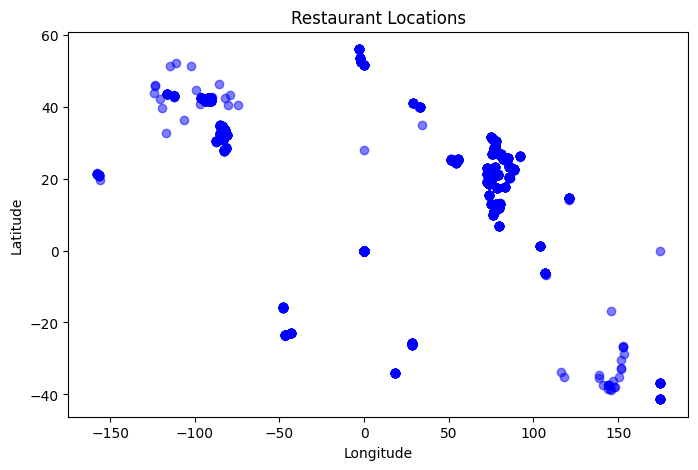

In [132]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Longitude'], df['Latitude'], marker='o', alpha=0.5, c='b')
plt.title('Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# don't use this one (only for review i used this)

<Axes: xlabel='Online_delivery'>

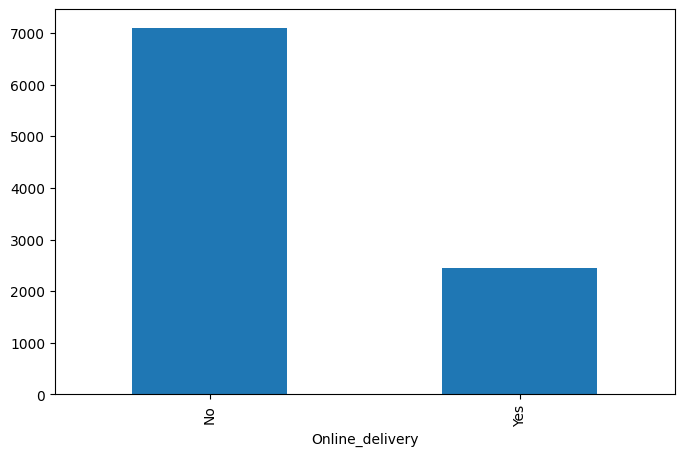

In [133]:
plt.figure(figsize=(8, 5))
df['Online_delivery'].value_counts().plot(kind='bar')

## Level 2 = Task 4
#### Task: Restaurant Chains
- Identify if there are any restaurant chains present in the dataset.
- Analyze the ratings and popularity of different restaurant chains.

### Identify if there are any restaurant chains present in the dataset.

In [134]:
restaurant_chain = df['Restaurant Name'].value_counts()
print('The restaurant chain in the dataset', restaurant_chain[restaurant_chain > 1])

The restaurant chain in the dataset Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


In [135]:
restaurant_chain.value_counts()

count
1     6712
2      468
3      108
4       46
5       28
6       18
7       13
8        7
9        6
19       4
18       4
14       4
11       3
22       3
13       3
12       3
20       2
16       2
10       1
83       1
79       1
26       1
28       1
29       1
30       1
34       1
48       1
51       1
63       1
15       1
Name: count, dtype: int64

### Analyze the ratings and popularity of different restaurant chains.

In [136]:
df= df.dropna(subset=['Aggregate rating', 'Votes'])
chain_stats = df.groupby('Restaurant Name').agg({'Aggregate rating':'mean', 'Votes':'sum'})

sorted_chain_stats_by_rating = chain_stats.sort_values(by='Aggregate rating', ascending=False)
sorted_chain_stats_by_votes = chain_stats.sort_values(by='Votes', ascending=False)
print(sorted_chain_stats_by_rating.head())
print(sorted_chain_stats_by_votes.head())

                         Aggregate rating  Votes
Restaurant Name                                 
Ingleside Village Pizza               4.9    478
Ministry of Crab                      4.9    203
Oakwood Cafe                          4.9    249
Marukame Udon                         4.9    602
Flat Iron                             4.9    309
                           Aggregate rating  Votes
Restaurant Name                                   
Barbeque Nation                    4.353846  28142
AB's - Absolute Barbecues          4.825000  13400
Toit                               4.800000  10934
Big Chill                          4.475000  10853
Farzi Cafe                         4.366667  10098


In [137]:
chain_groups = df.groupby('Restaurant Name')
average_ratings = chain_groups['Aggregate rating'].mean()
total_votes = chain_groups['Votes'].sum()

rank_by_ratings = average_ratings.sort_values(ascending=False)
print(rank_by_ratings.head())
print()
rank_by_votes = total_votes.sort_values(ascending=False)
print(rank_by_votes.head())

Restaurant Name
Ingleside Village Pizza    4.9
Ministry of Crab           4.9
Oakwood Cafe               4.9
Marukame Udon              4.9
Flat Iron                  4.9
Name: Aggregate rating, dtype: float64

Restaurant Name
Barbeque Nation              28142
AB's - Absolute Barbecues    13400
Toit                         10934
Big Chill                    10853
Farzi Cafe                   10098
Name: Votes, dtype: int64


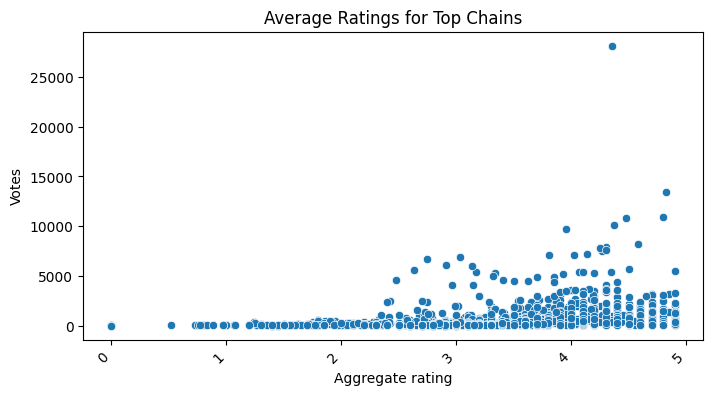

In [138]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=rank_by_ratings, y=rank_by_votes)
plt.xticks(rotation=45, ha='right')
plt.title('Average Ratings for Top Chains')
plt.show()

## Level 3 = Task 1
#### Task: Restaurant Reviews
- Analyze the text reviews to identify the most common positive and negative keywords.
- Calculate the average length of reviews and explore if there is a relationship between review length and rating.

### Analyze the text reviews to identify the most common positive and negative keywords.

In [139]:
df['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

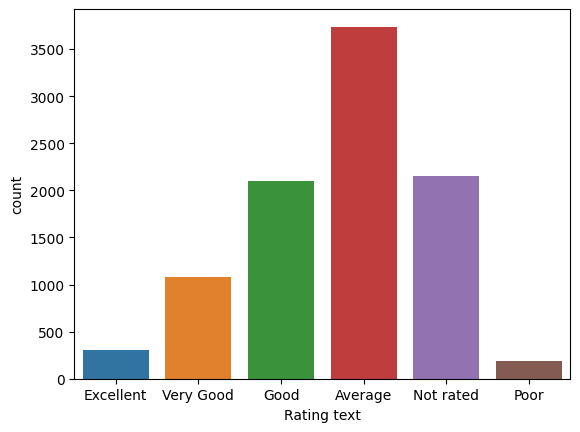

In [140]:
sns.countplot(x=df['Rating text'])
plt.show()

### Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [141]:
a = df['Aggregate rating'].value_counts().mean()
a

289.42424242424244

In [142]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Longitude', 'Latitude',
       'Cuisines', 'Table_booking', 'Online_delivery', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes', 'Cluster'],
      dtype='object')

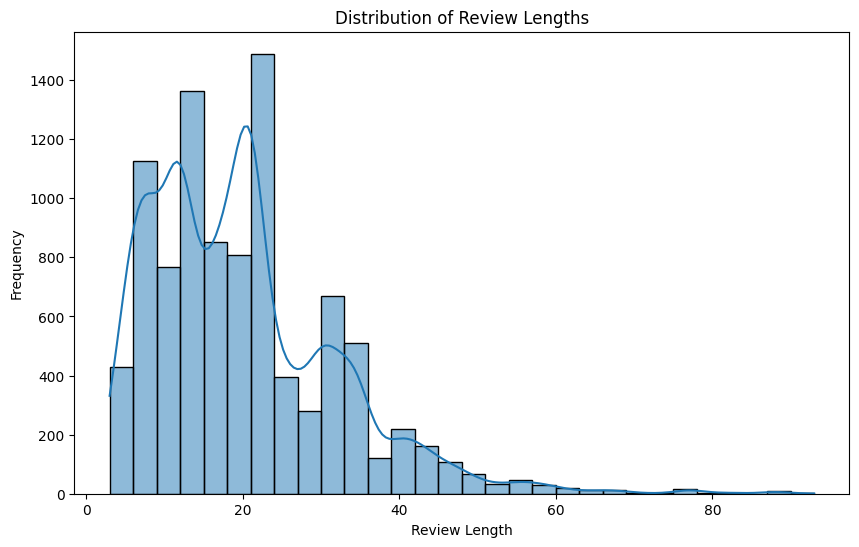

Average Review Length: 19.92 characters


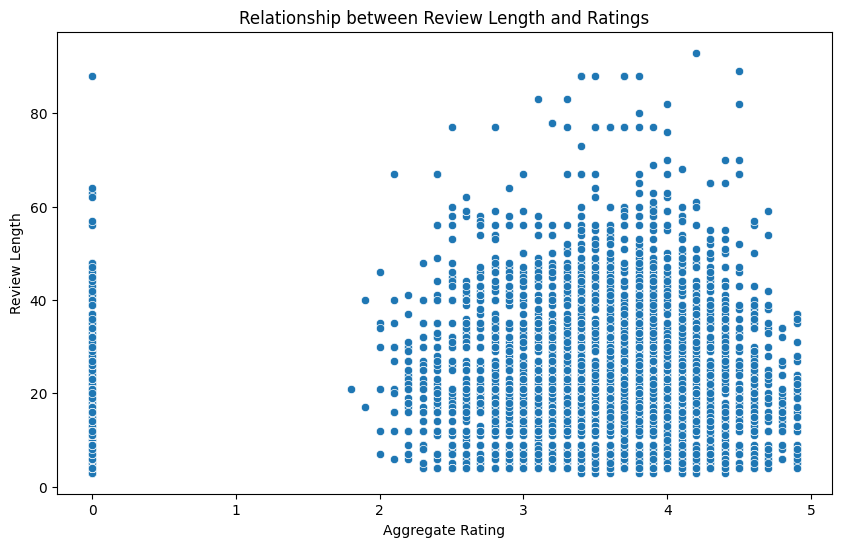

Correlation Coefficient: 0.19
Correlation: 0.19, p-value: 0.0000


In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate Review Length (using 'Cuisines' as a proxy)
df['Review Length'] = df['Cuisines'].apply(lambda x: len(str(x)))

# Step 2: Explore Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Review Length', bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Step 3: Calculate Average Review Length
average_review_length = df['Review Length'].mean()
print(f'Average Review Length: {average_review_length:.2f} characters')

# Step 4: Explore Relationship with Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Aggregate rating', y='Review Length')
plt.title('Relationship between Review Length and Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Review Length')
plt.show()

# Step 5: Correlation Analysis
correlation_coefficient = df[['Aggregate rating', 'Review Length']].corr().iloc[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

# Step 6: Statistical Analysis (Optional)
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['Aggregate rating'], df['Review Length'])
print(f'Correlation: {correlation:.2f}, p-value: {p_value:.4f}')


## Level 3 = Task 2
#### Task: Votes Analysis
- Identify the restaurants with the highest and lowest number of votes.
- Analyze if there is a correlation between the number of votes and the rating of a restaurant.

### Identify the restaurants with the highest and lowest number of votes.

In [161]:
Restautant_votes = df.groupby(['Restaurant Name'])['Votes'].mean()
print(Restautant_votes.max())
print(Restautant_votes.min())

10934.0
0.0


In [162]:
Restaurant_highest_votes = df.loc[df['Votes'].idxmax()]
print('Restaurant with the highest vote number is:')
print(Restaurant_highest_votes[['Restaurant Name', 'Votes']])
print('\n')
Restaurant_lowest_votes = df.loc[df['Votes'].idxmin()]
print('Restaurant with the lowest vote number is:')
print(Restaurant_lowest_votes[['Restaurant Name', 'Votes']])

Restaurant with the highest vote number is:
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object


Restaurant with the lowest vote number is:
Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


### Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [150]:
df[['Votes', 'Aggregate rating']]

,Votes,Aggregate rating
0,314,4.8
1,591,4.5
2,270,4.4
3,365,4.9
4,229,4.8
...,...,...
9546,788,4.1
9547,1034,4.2
9548,661,3.7
9549,901,4.0


In [151]:
correlation = df[['Votes', 'Aggregate rating']].corr()
correlation

,Votes,Aggregate rating
Votes,1.000000,0.313691
Aggregate rating,0.313691,1.000000


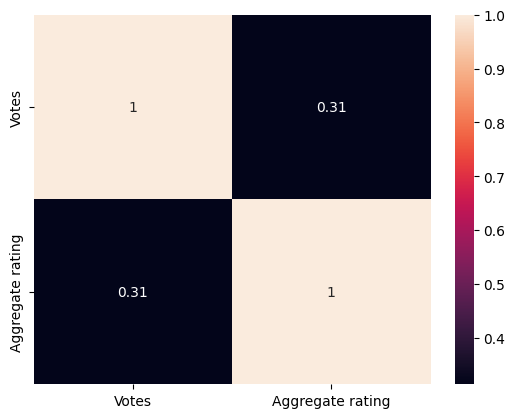

<Figure size 500x400 with 0 Axes>

In [152]:
sns.heatmap(correlation, annot=True)
plt.figure(figsize=(5, 4))
plt.show()

## Level 3 = Task 3
#### Task: Price Range vs. Online Delivery and Table Booking
- Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
- Determine if higher-priced restaurants are more likely to offer these services.

### Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [165]:
cross_tab = pd.crosstab(index=df['Price range'], columns=[df['Online_delivery'], df['Table_booking']])
cross_tab

Online_delivery    No        Yes     
Table_booking      No  Yes    No  Yes
Price range                          
1                3743    0   700    1
2                1711  116  1163  123
3                 624  373   140  271
4                 299  234    13   40

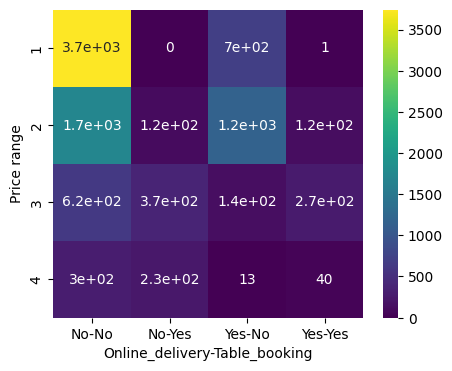

In [168]:
plt.figure(figsize=(5, 4))
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.show()

In [153]:
df['Table_booking'].unique()

array(['Yes', 'No'], dtype=object)

In [154]:
df.groupby('Online_delivery')['Price range'].mean()

Online_delivery
No     1.763380
Yes    1.924929
Name: Price range, dtype: float64

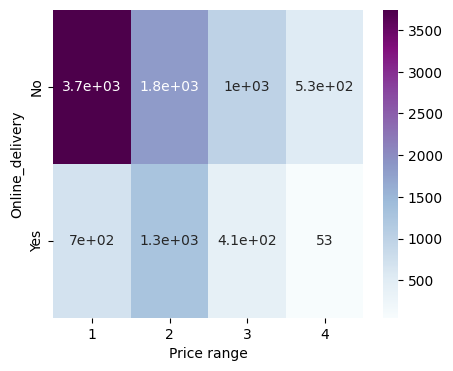

In [163]:
crosstab = pd.crosstab(df['Online_delivery'], df['Price range'])
plt.figure(figsize=(5, 4))
sns.heatmap(crosstab, annot=True, cmap='BuPu')
plt.show()

In [155]:
df.groupby('Table_booking')['Price range'].mean()

Table_booking
No     1.636006
Yes    3.028497
Name: Price range, dtype: float64

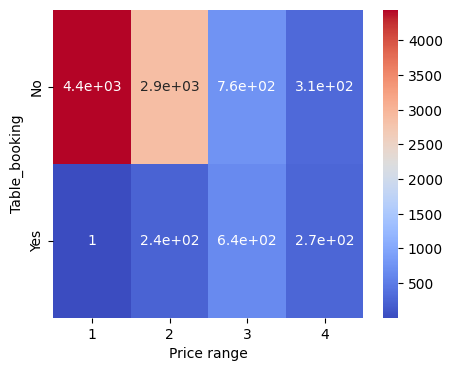

In [164]:
crosstab = pd.crosstab(df['Table_booking'], df['Price range'])
plt.figure(figsize=(5, 4))
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.show()

### Determine if higher-priced restaurants are more likely to offer these services.

In [156]:
df['Price range'].max()

4

In [157]:
df['Online_delivery'].value_counts()

Online_delivery
No     7100
Yes    2451
Name: count, dtype: int64

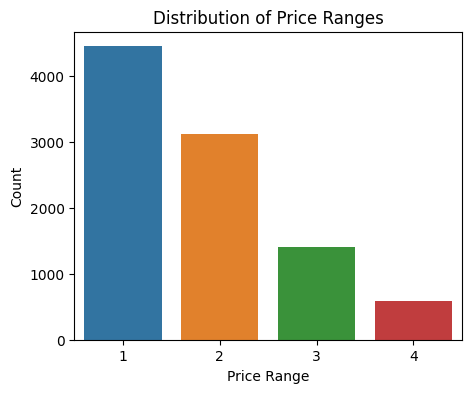

In [158]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Price range', data=df)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

In [159]:
table_booking_proportion = df['Table_booking'].value_counts(normalize=True)
online_delivery_proportion = df['Online_delivery'].value_counts(normalize=True)

print("Proportion of Restaurants Offering Table Booking:")
print(table_booking_proportion)

print("\nProportion of Restaurants Offering Online Delivery:")
print(online_delivery_proportion)


Proportion of Restaurants Offering Table Booking:
Table_booking
No     0.878756
Yes    0.121244
Name: proportion, dtype: float64

Proportion of Restaurants Offering Online Delivery:
Online_delivery
No     0.743378
Yes    0.256622
Name: proportion, dtype: float64


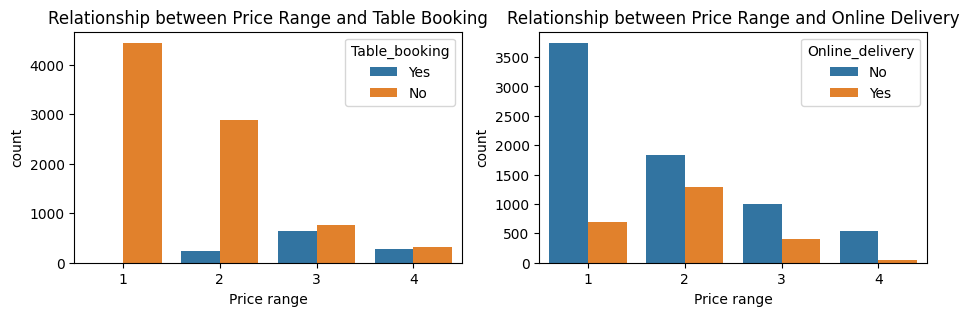

In [160]:
plt.figure(figsize=(11, 3))

plt.subplot(1, 2, 1)
sns.countplot(x='Price range', hue='Table_booking', data=df)
plt.title('Relationship between Price Range and Table Booking')

plt.subplot(1, 2, 2)
sns.countplot(x='Price range', hue='Online_delivery', data=df)
plt.title('Relationship between Price Range and Online Delivery')

plt.show()

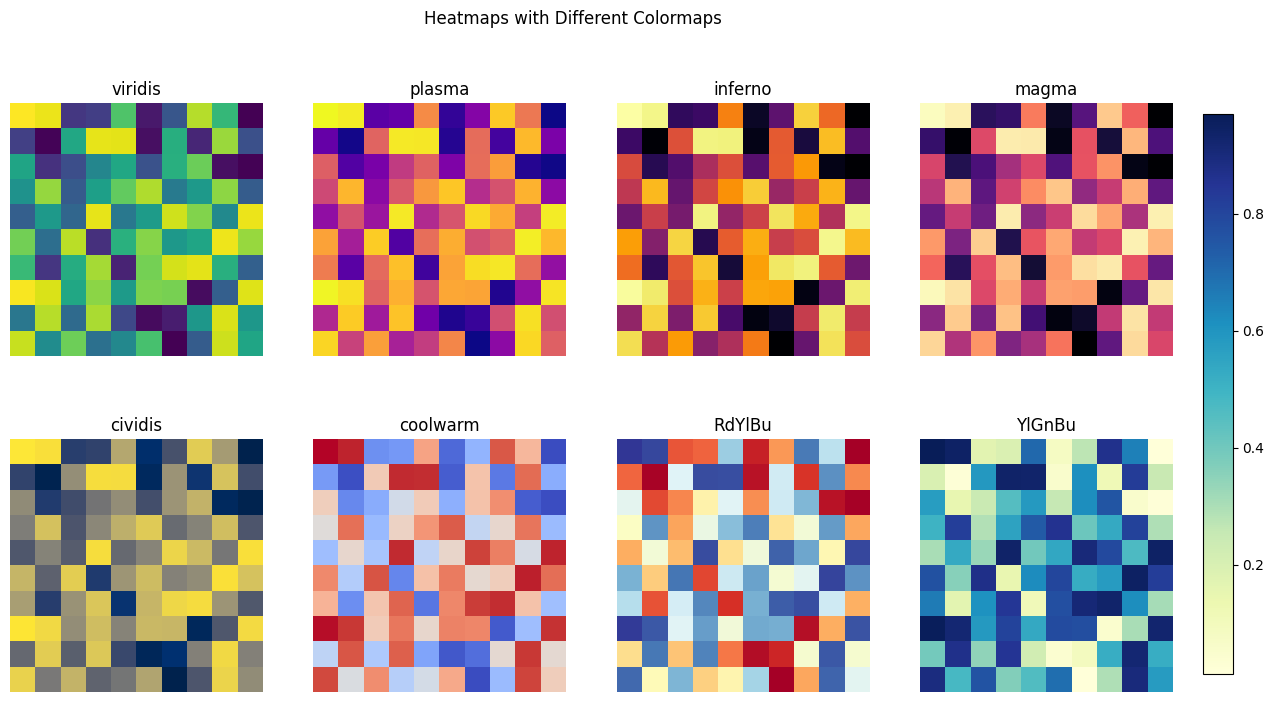

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random 2D array for demonstration
data = np.random.random((10, 10))

# Define colormaps
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'coolwarm', 'RdYlBu', 'YlGnBu']

# Plot the heatmap using different colormaps
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Heatmaps with Different Colormaps')

for ax, cmap in zip(axes.flatten(), cmaps):
    im = ax.imshow(data, cmap=cmap)
    ax.set_title(cmap)
    ax.axis('off')

# Add a colorbar for reference
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()


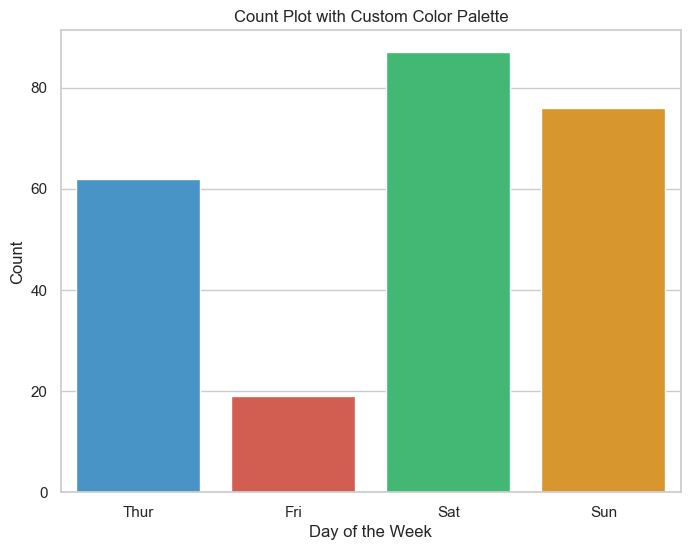

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration
data = sns.load_dataset("tips")

# Set a custom color palette
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12"]

# Create a count plot with the specified color palette
sns.set(style="whitegrid")  # Optional: Set a whitegrid background
plt.figure(figsize=(8, 6))
sns.countplot(x="day", data=data, palette=custom_palette)

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Count Plot with Custom Color Palette")

# Show the plot
plt.show()
